In [6]:
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
df = pd.read_csv("weather_history.csv")
df["date"] = pd.to_datetime(df["date"])
df["avg_temp"] = (df["tempmax"] + df["tempmin"]) / 2

df.head()


,date,tempmax,tempmin,conditions,name,avg_temp
0,2025-05-21,65.0,49.0,Partially cloudy,Seattle,57.00
1,2025-05-22,65.0,49.0,Partially cloudy,Seattle,57.00
2,2025-05-23,67.0,47.0,Partially cloudy,Seattle,57.00
3,2025-05-24,70.8,48.6,Partially cloudy,Seattle,59.70
4,2025-05-25,75.8,51.3,Partially cloudy,Seattle,63.55


In [9]:
df["name"].unique()

array(['Seattle'], dtype=object)

## Avg temp per city

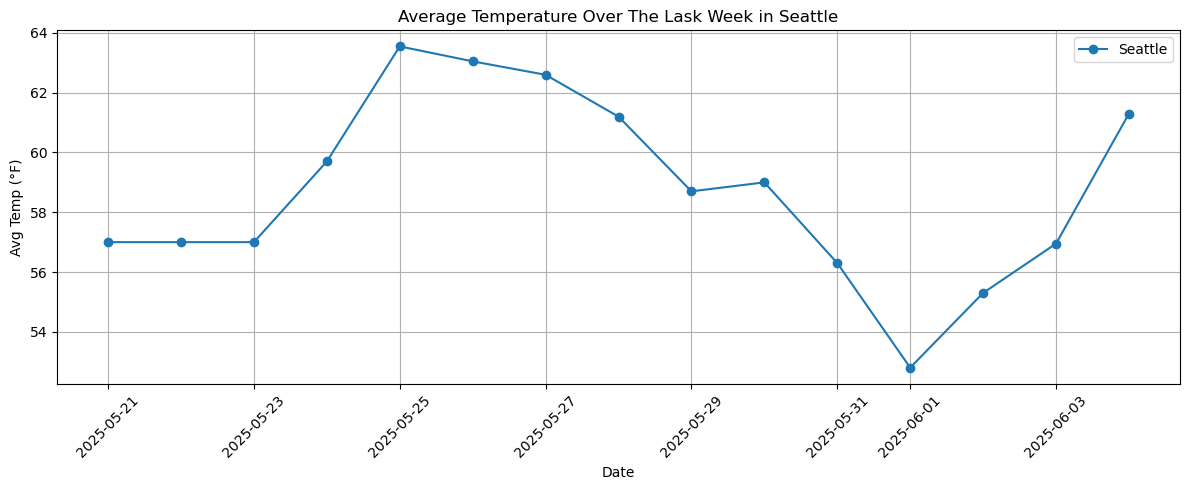

In [14]:
plt.figure(figsize=(12, 5))

for city in df["name"].unique():
    city_df = df[df["name"] == city]
    plt.plot(city_df["date"], city_df["avg_temp"], marker="o", label=city)

plt.title(f"Average Temperature Over The Lask Week in {city}")
plt.xlabel("Date")
plt.ylabel("Avg Temp (°F)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Weather condition frequency by city

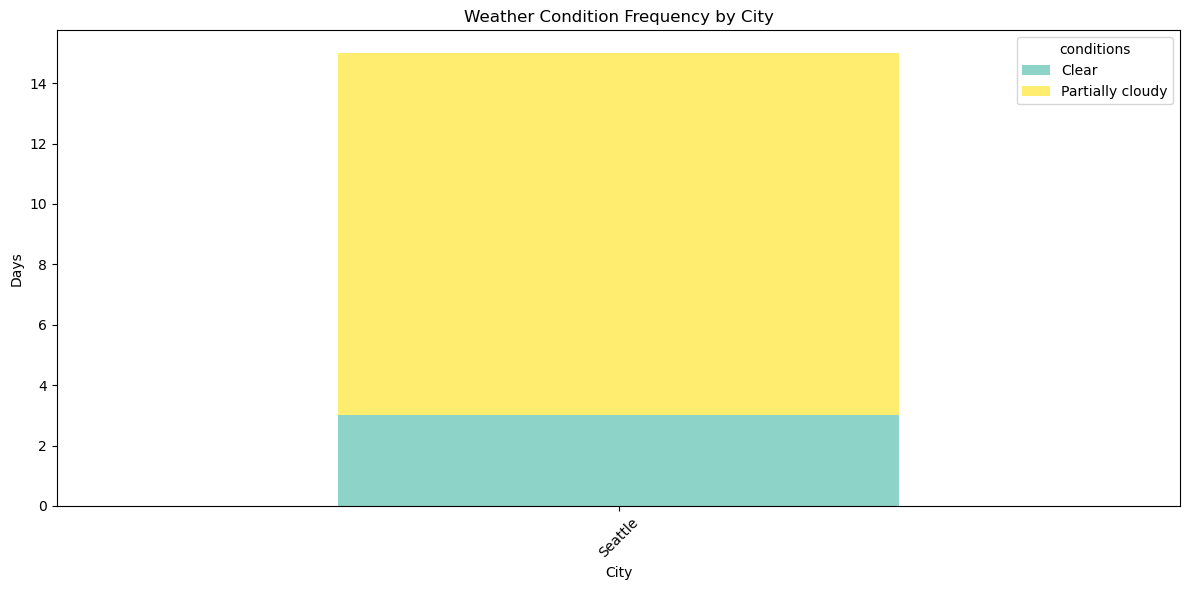

In [ ]:
condition_summary = df.groupby(["name", "conditions"]).size().unstack(fill_value=0)

condition_summary.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="Set3")
plt.xlabel("City")
plt.ylabel("Days")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## box plot for temperature range per city

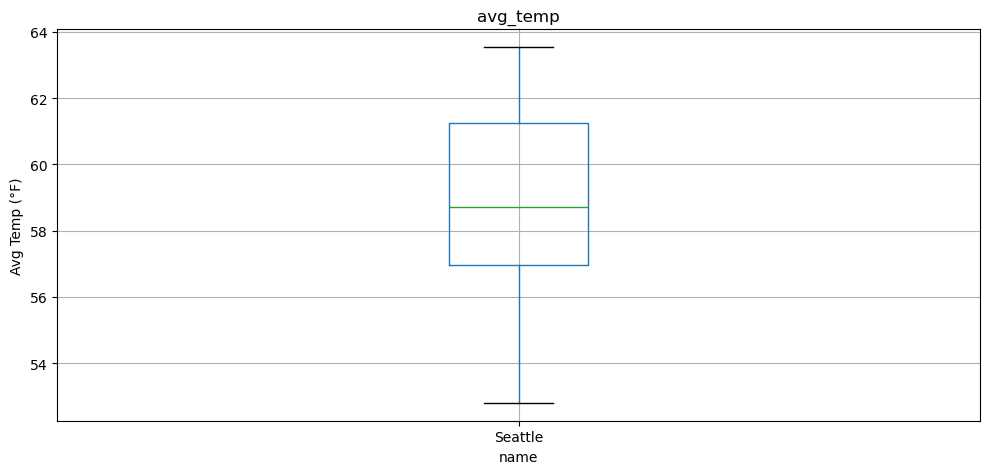

In [17]:
df.boxplot(column="avg_temp", by="name", figsize=(10, 5))
plt.suptitle("")
plt.ylabel("Avg Temp (°F)")
plt.grid(True)
plt.tight_layout()
plt.show()

## summary table

In [18]:
latest = df.sort_values("date").groupby("name").tail(1)
latest[["name", "date", "tempmax", "tempmin", "avg_temp", "conditions"]]

,name,date,tempmax,tempmin,avg_temp,conditions
14,Seattle,2025-06-04,75.6,47.0,61.3,Partially cloudy
